In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from scipy import stats

sns.set_style('darkgrid')

# Insurance Cost Dataset - Exploratory Data Analysis

# Dataset

## Dataset Information:

- **age**: age of primary beneficiary [int]
- **sex**: gender of insurance contractor (Male/Female) [str]
- **bmi**: body mass index, ideally 18.5 to 24.9 [float]
- **children**: number of children covered by health insurance / number of dependents [int]
- **smoker**: smoker [binary]
- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. [str]
- **charges**: individual medical costs billed by health insurance [float]

In [2]:
# criando o dataframe
DATA_DIR = 'data/insurance.csv'
df = pd.read_csv(DATA_DIR)

# visualizando o cabeçalho e printando algumas informações
print('Linhas: ', df.shape[0])
print('Colunas: ', df.shape[0])

df.head()

Linhas:  1338
Colunas:  1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Summary Statistics:

- **Age**: Mean age is 39.21 years, with a minimum of 18 years and a maximum of 64 years.
- **BMI**: Mean BMI is 30.66, with a minimum of 15.96 and a maximum of 53.13.
- **Children**: Most individuals have 0 or 1 child, with a maximum of 5 children.
- **Charges**: Mean medical charges are $13270.42, with a minimum of $1121.87 and a maximum of $63770.43.

In [3]:
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


## Data Insights:

- The dataset contains information on 1338 individuals.
- The age distribution shows a relatively even spread across the range.
- BMI distribution indicates that many individuals fall into the overweight or obese categories.
- The majority of individuals have 0 or 1 child, with fewer having 2 or more children.
- The distribution of charges shows a wide range, with some individuals incurring very high medical costs.

## Data Type Conversion:

  The `sex`, `smoker`, and `region` columns have been converted to categorical dtype, even though the dataset is not large.
  This conversion is done to improve performance by reducing memory usage and optimizing data access, which can be beneficial for future analyses and operations on the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Removing NaN Values and Duplicates:

- Check for and remove any rows with NaN values.
- Check for and remove any duplicate rows.

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(1338, 7)
(1337, 7)


# Exploratory Data Analysis

## Frequency Distribution

We can classify our dataset into two types of variables:
* Categorical: sex, smoker, region
* Quantitative: age, bmi, children, charges

### Quantitative Variables

In [8]:
# Create a figure with subplots
fig = go.Figure()

columns = ['age', 'bmi', 'charges', 'children']
# Creating individual histograms for each column
for col in columns:
    # fig = go.Figure(data=[go.Histogram(x=df[col])])
    fig = px.histogram(df[col], marginal='box')
    fig.update_layout(
        title=f'Histogram of {col}',
        xaxis_title='Value',
        yaxis_title='Count',
        template='plotly_white',   
        width=800
    )
    fig.show()

- **Age**: The age distribution is approximately normal, with a slight right skew. The box plot shows that most individuals are between 20 and 50 years old, with a median around 40 years.

- **BMI (Body Mass Index)**: The BMI distribution appears to be right-skewed, indicating that more individuals have higher BMIs. The box plot shows a few outliers with very high BMIs.

- **Charges**: The distribution of medical charges is highly right-skewed, indicating that a few individuals incur very high medical costs. The box plot confirms this, showing a wide range of charges with several outliers.

- **Children**: The distribution of the number of children covered by insurance is right-skewed, with most individuals having fewer children. The box plot shows that the majority of individuals have 0 or 1 child, with fewer having 2 or more children.

**Analyzing the bar chart showing the number of subjects by age.**

In [9]:
import plotly.graph_objects as go

# Counting the occurrences of each age
age_counts = df['age'].value_counts().reset_index()
age_counts.columns = ['age', 'count']

# Creating the plot with a different color palette
fig = go.Figure(
    data=[
        go.Bar(x=age_counts['age']
               , y=age_counts['count']
               , marker=dict(color=age_counts['count'], colorbar=dict(title='Count'), colorscale='temps'))
        ]
    )
fig.update_layout(
    title='Count of Ages'
    , xaxis_title='Age'
    , yaxis_title='Count'
    , title_font_size=15
    , xaxis_title_font_size=12
    , yaxis_title_font_size=12
    )

# Add all ages to the x-axis tick labels
fig.update_xaxes(tickvals=age_counts['age'], ticktext=age_counts['age'])

fig.show()


In [10]:
# Separating the data into two groups: 18-19 years old and others
group_18_19 = df[df['age'].isin([18, 19])]
others = df[~df['age'].isin([18, 19])]

display(group_18_19.describe())
display(others.describe())

,age,bmi,children,charges
count,136.000000,136.000000,136.000000,136.000000
mean,18.492647,29.966949,0.441176,8457.112375
std,0.501794,6.587880,0.884138,11446.127052
min,18.000000,15.960000,0.000000,1121.873900
25%,18.000000,25.175000,0.000000,1634.420500
50%,18.000000,30.025000,0.000000,2167.271950
75%,19.000000,34.407500,1.000000,13772.030762
max,19.000000,53.130000,5.000000,39722.746200


,age,bmi,children,charges
count,1201.000000,1201.000000,1201.000000,1201.000000
mean,41.569525,30.742323,1.169858,13825.160820
std,12.858993,6.040676,1.214958,12066.884689
min,20.000000,16.815000,0.000000,1391.528700
25%,30.000000,26.400000,0.000000,5438.749100
50%,42.000000,30.495000,1.000000,9800.888200
75%,52.000000,34.770000,2.000000,17179.522000
max,64.000000,52.580000,5.000000,63770.428010


✅ Conclusions:

Medical Expenses: The average medical expenses of the other age group are significantly higher than those of the 18 and 19-year-old group ($13,825.16 vs. $8,457.11).

BMI: Although the difference is not large, the other age group has a slightly higher average BMI than the 18 and 19-year-old group (30.74 vs. 29.97).

Number of Children: The other age group has, on average, a higher number of children than the 18 and 19-year-old group (1.17 vs. 0.44).

### Categorical Variables

#### Correlation

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


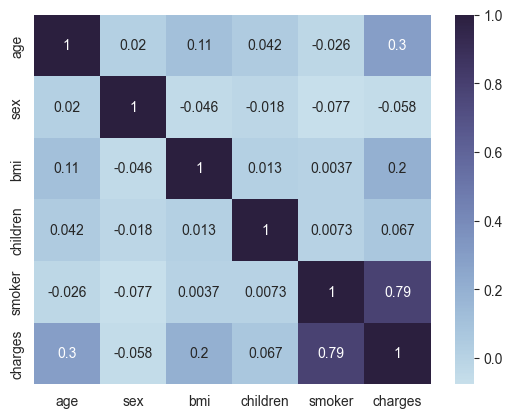

In [12]:
df.loc[df['sex'] == 'male', 'sex'] = 0
df.loc[df['sex'] == 'female', 'sex'] = 1

df.loc[df['smoker'] == 'yes', 'smoker'] = 1
df.loc[df['smoker'] == 'no', 'smoker'] = 0

corr = df.drop('region', axis=1).corr()
ax = sns.heatmap(corr,  cmap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True) , annot= True);

In [13]:
corr['charges'].to_frame().sort_values('charges', ascending=False)

,charges
charges,1.000000
smoker,0.787234
age,0.298308
bmi,0.198401
children,0.067389
sex,-0.058044


- **Age**: 0.298308 (moderate positive correlation)
- **Sex**: -0.058044 (weak negative correlation)
- **Children**: 0.067389 (weak positive correlation)
- **Smoker**: 0.787234 (strong positive correlation)

#### Cost Related to Smoking and Non-Smoking Patients

C:\Users\victo\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\victo\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\victo\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\victo\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\victo\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:14

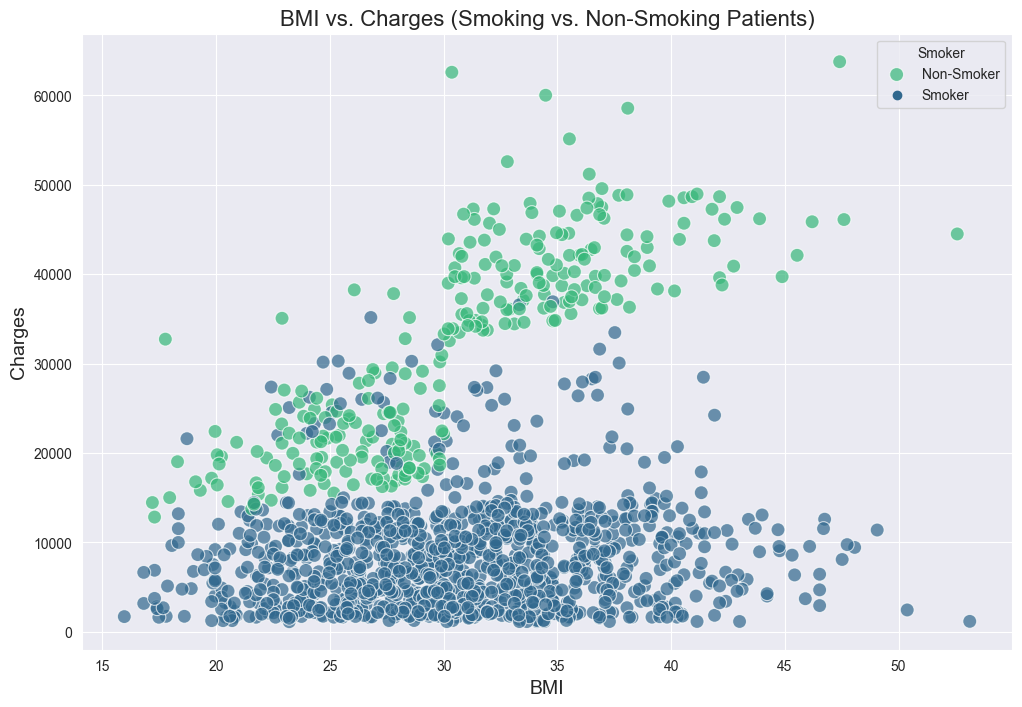

In [14]:
# Creating the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='viridis', alpha=0.7, s=100)

# Adding labels and title
plt.title('BMI vs. Charges (Smoking vs. Non-Smoking Patients)', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Charges', fontsize=14)

# Adding a legend
plt.legend(title='Smoker', loc='upper right', labels=['Non-Smoker', 'Smoker'])

# Displaying the plot
plt.show()

In [84]:
fig = px.box(df, x='charges', y='smoker', orientation='h', title='Boxplot of Charges vs Smoker')
fig.update_traces(marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1)))
fig.update_layout(xaxis_title='Charges', yaxis_title='Smoker', showlegend=False)

fig.show()

✅ We cannot consider smoking as a standalone factor because there are other diseases that prevent individuals from smoking, which consequently increase medical expenses. Since we do not have this information, we may consider the outliers in the dataset.

✅ It can be observed that the value of charges is higher for patients with a BMI above 30 - which is consequently the average of the dataset. The value becomes even higher when there are occurrences of smoking subjects.

- Null Hypothesis (H0): The mean medical charges for patients with a BMI above 30 is the same for smokers and non-smokers.
- Alternative Hypothesis (H1): The mean medical charges for patients with a BMI above 30 is higher for smokers compared to non-smokers.

We can then perform a t-test to compare the means of the two groups (smokers and non-smokers) for patients with a BMI above 30.

In [21]:
# Filter the dataframe for patients with BMI above 30
bmi_above_30 = df[df['bmi'] > 30]

# Perform the t-test
smokers_charges = bmi_above_30[bmi_above_30['smoker'] == 1]['charges']
non_smokers_charges = bmi_above_30[bmi_above_30['smoker'] == 0]['charges']
t_statistic, p_value = stats.ttest_ind(smokers_charges, non_smokers_charges, alternative='greater')

print(f"T-statistic: {t_statistic}\nP-value: {p_value}")

T-statistic: 58.08893900360491
P-value: 1.1980706722506017e-270


We use alternative='greater' because we are interested in testing if the mean medical charges for smokers are greater than for non-smokers among patients with a BMI above 30. This is a one-tailed test where the alternative hypothesis is that the charges for smokers are greater than for non-smokers.

✅ We can reject the null hypothesis and conclude that there is a significant difference in the mean medical charges for patients with a BMI above 30 between smokers and non-smokers, with charges being higher for smokers.

#### Sex x Charges

In [47]:
# Create a histogram with separate facets for each category
fig = px.histogram(df, x='charges', color='sex', marginal='box', facet_col='sex',
                   labels={'charges': 'Charges', 'sex': 'Sex'},
                   title='Distribution of Charges by Sex',
                   width=1200, height=500)

# Update the layout
fig.update_layout(showlegend=False)
fig.show()

- Null Hypothesis (H0): There is no difference in the mean medical charges between male and female patients.
- Alternative Hypothesis (H1): There is a difference in the mean medical charges between male and female patients.

In [49]:
# Separar os dados por sexo
charges_male = df[df['sex'] == 1]['charges']
charges_female = df[df['sex'] == 0]['charges']

# Executar o teste t
t_statistic, p_value = stats.ttest_ind(charges_male, charges_female)

print(f"T-statistic: {t_statistic}\nP-value: {p_value}")

T-statistic: -2.124391307062026
P-value: 0.0338207919951195


✅ This indicates that there is a statistically significant difference in the mean medical charges between male and female patients.

In [58]:
# Create a violin plot
fig = px.violin(df, x='children', y='charges', box=True, points='all')

# Update the layout
fig.update_layout(title='Distribution of Charges by Number of Children',
                  xaxis_title='Number of Children',
                  yaxis_title='Charges',
                  violinmode='group',
                  template='plotly_white')

fig.show()


There is a difference between people who have 4 or 5 children compared to others.

- Null Hypothesis (H0): There is no significant difference in the mean medical charges between the groups with 0, 1, 2, and 3 dependents.
- Alternative Hypothesis (H1): There is a significant difference in the mean medical charges between at least one pair of groups with 0, 1, 2, and 3 dependents.

In [72]:
from scipy.stats import f_oneway

children_groups = [df[df['children'] == i]['charges'] for i in [0,1,2,3]]

f_statistic, p_value = f_oneway(*children_groups)

print(f"F-statistic: {f_statistic}\nP-value: {p_value}")

F-statistic: 4.499396041300432
P-value: 0.003787473496265598


✅ This suggests that there is a significant difference in the mean medical charges between at least one pair of groups with 0, 1, 2, and 3 dependents.

#### BMI x Smoker

In [75]:
fig = px.box(df, x='bmi', y='smoker', orientation='h', title='Boxplot of BMI vs Smoker')
fig.update_traces(marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1)))
fig.update_layout(xaxis_title='BMI', yaxis_title='Smoker', showlegend=False)

fig.show()

In [78]:
(
    df.groupby('smoker')
    .describe()['bmi']
    .round(2)
)

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,1063.0,30.65,6.05,15.96,26.32,30.30,34.43,53.13
1,274.0,30.71,6.32,17.20,26.08,30.45,35.20,52.58


In [79]:
# Separar os dados por sexo
bmi_nonsmoker = df[df['smoker'] == 0]['bmi']
bmi_smoker = df[df['smoker'] == 1]['bmi']

# Executar o teste t
t_statistic, p_value = stats.ttest_ind(bmi_nonsmoker, bmi_smoker)

print(f"T-statistic: {t_statistic}\nP-value: {p_value}")

T-statistic: -0.13687893088832626
P-value: 0.8911471317222854


✅ This suggests that there is no strong evidence to conclude that smokers and non-smokers have different BMIs based on the given dataset.

✅ 75% of both smokers and non-smokers have a BMI above 26, with a median of approximately 30 and a standard deviation of approximately 6.

✅ Some individuals may have health conditions that prevent them from smoking, but this information was not provided in the dataset.

#### Age vs Smoker

In [81]:
fig = px.box(df, x='age', y='smoker', orientation='h', title='Boxplot of Age vs Smoker')
fig.update_traces(marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1)))
fig.update_layout(xaxis_title='Age', yaxis_title='Smoker', showlegend=False)

fig.show()

In [82]:
(
    df.groupby('smoker')
    .describe()['age']
    .round(2)
)

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,1063.0,39.40,14.08,18.0,27.0,40.0,52.0,64.0
1,274.0,38.51,13.92,18.0,27.0,38.0,49.0,64.0
